### Running time

0
1
2
3
4
5
6
7
8
9
10
11
12
13


/var/folders/m4/4bntcmkd2mx2w6ml10hl9_h40000gn/T/ipykernel_39228/3607645120.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_data, y_data,"bo",label='Original data',color = 'dodgerblue')
/var/folders/m4/4bntcmkd2mx2w6ml10hl9_h40000gn/T/ipykernel_39228/3607645120.py:65: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_data, fit_function(x_data, *popt), 'r-', label='Fitted curve', color = 'coral', linestyle = '--')
/var/folders/m4/4bntcmkd2mx2w6ml10hl9_h40000gn/T/ipykernel_39228/3607645120.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_data, fit_function(x_data, *popt), 'r-', label='Fitted curve', color 

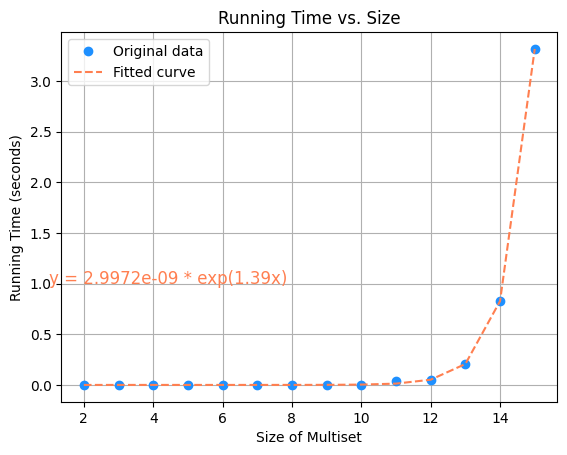

In [2]:
import time
import matplotlib.pyplot as plt
from itertools import combinations
import random
import numpy as np
from scipy.optimize import curve_fit

def generate_random_numbers(n):
    return [random.random() for _ in range(n)]

def make_combos(my_set):
    my_set = [x for x in my_set if x != 0]

    if len(my_set) < 2:
        raise ValueError("Size of the set must be greater than 2")

    combos = []
    for i in range(2, len(my_set) +1):
        combos.extend(combinations(my_set,i))
    combos_list = [list(comb) for comb in combos]
    unique_combo_list = []

    [unique_combo_list.append(x) for x in combos_list if x not in unique_combo_list]

    return unique_combo_list

def get_sums(combos, target):
    good_list= []
    for combo in combos:
        if sum(combo) == target:
            good_list.append(combo)

x = []
y = []
for i in range(14):
    toAdd = generate_random_numbers(i+2)
    
    start_time = time.time()

    combos = make_combos(toAdd)               
    result = get_sums(combos,5)

    end_time = time.time()        

    runTime = end_time - start_time
    x.append(i+2)
    y.append(runTime)
    print(i)

# Convert lists to numpy arrays for curve fitting
x_data = np.array(x)
y_data = np.array(y)

# Define the function to fit (you need to define your function here)
def fit_function(x, a, b):
    return a * np.exp(b * x)  # This is just an example function, you should replace it with the function you want to fit

# Perform the curve fitting
popt, pcov = curve_fit(fit_function, x_data, y_data)

# Plot the data
plt.plot(x_data, y_data,"bo",label='Original data',color = 'dodgerblue')

# Plot the fitted curve
plt.plot(x_data, fit_function(x_data, *popt), 'r-', label='Fitted curve', color = 'coral', linestyle = '--')

# Create a string representation of the fitted function
fitted_function_str = f'y = {popt[0]:.4e} * exp({popt[1]:.2f}x)'

# Annotate the plot with the equation of the fitted function
plt.text(1, 1, fitted_function_str, fontsize=12, color='coral')

plt.xlabel('Size of Multiset')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. Size')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
def generate_random_numbers(n):
    return [random.random() for _ in range(n)]

def make_combos(my_set):
    my_set = [x for x in my_set if x != 0]

    if len(my_set) < 2:
        raise ValueError("Size of the set must be greater than 2")

    combos = []
    for i in range(2, len(my_set) +1):
        combos.extend(combinations(my_set,i))
    combos_list = [list(comb) for comb in combos]
    unique_combo_list = []

    [unique_combo_list.append(x) for x in combos_list if x not in unique_combo_list]

    return unique_combo_list

def get_sums(combos, target):
    good_list= []
    for combo in combos:
        if sum(combo) == target:
            good_list.append(combo)
    return good_list

toAdd = [0,1,3,3,3,3,6,12,17,31,54,66]
target = 87
combos = make_combos(toAdd)               
result = get_sums(combos,target)

print(result)


[[1, 3, 17, 66], [3, 6, 12, 66], [1, 3, 12, 17, 54], [3, 3, 3, 12, 66], [1, 3, 3, 3, 6, 17, 54]]


# Number of Logic Gates

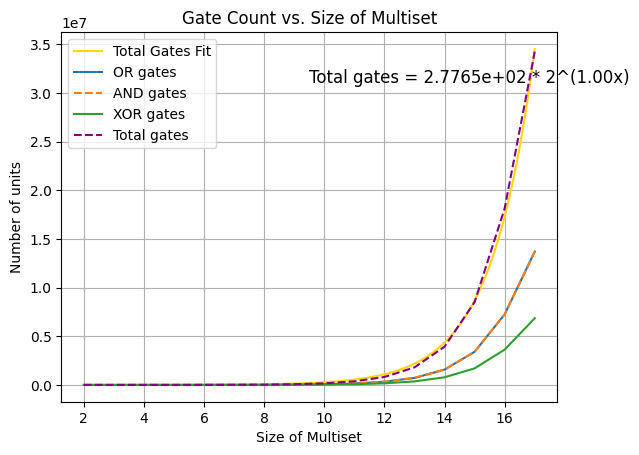

In [8]:
def count_bits(decimal_number):
    # Convert decimal number to binary
    binary_number = bin(decimal_number)

    # Remove '0b' prefix from binary representation
    binary_number = binary_number[2:]

    # Count the number of bits
    num_bits = len(binary_number)

    return num_bits

def get_num_gates(combo_list):
    oar = 0
    andy = 0
    xor = 0
    total = 0
    for combo in combo_list:
        large = max(combo)

        num_bits = count_bits(large)

        oar += (num_bits*2) * (len(combo)-1)
        andy += num_bits*2 * (len(combo)-1)
        xor += num_bits * (len(combo)-1)

        total += (num_bits*5) * (len(combo)-1)
    return(oar,andy,xor,total)

def generate_random_positive_integer(upper_bound):
    return random.randint(1, upper_bound)



#for each bit we add we need 5 gates, 2 xor, 2 and, and 1 or
x = []

oar = []
andy = []
xor = []

total = []
for i in range(16):
    toAdd = [generate_random_positive_integer(255) for _ in range(i + 2)]

    combos = make_combos(toAdd)               
    nums = get_num_gates(combos)

    x.append(i+2)

    oar.append(nums[0])
    andy.append(nums[1])
    xor.append(nums[2])
    total.append(nums[3])

x_data = np.array(x)
y_data = np.array(total)

# Define the function to fit with base 2
def fit_function_base_2(x, a, b):
    return a * np.power(2, b * x)

popt, pcov = curve_fit(fit_function_base_2, x_data, y_data)

# Create a string representation of the fitted function
fitted_function_str = f'Total gates = {popt[0]:.4e} * 2^({popt[1]:.2f}x)'
x_fit = np.linspace(min(x), max(x), 100)
y_fit = fit_function_base_2(x_fit, *popt)

plt.plot(x_fit, y_fit, label='Total Gates Fit', color='gold')

plt.text(0.5, 0.9, fitted_function_str, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.plot(x, oar, label='OR gates')
plt.plot(x, andy, label='AND gates',linestyle = '--')
plt.plot(x, xor, label='XOR gates')
plt.plot(x, total, linestyle = '--',label='Total gates',color = 'purple')

plt.xlabel('Size of Multiset')
plt.ylabel('Number of units')
plt.title('Gate Count vs. Size of Multiset')
plt.legend()
plt.grid(True)
plt.show()

